<a href="https://colab.research.google.com/github/cbaldassari/manifold/blob/main/Paper6_step3_c_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install community
!pip install python-louvain
!pip install tsia
!pip install easydev
!pip install colormap
!pip install tomaster
!pip install ts2vg
!pip install karateclub
!pip install POT
!pip install XlsxWriter
!pip install umap-learn
!pip install trimap
!pip install pacmap

In [ ]:
%%capture
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from tqdm import tqdm
import xlsxwriter

import os
import sys
import seaborn as sns

import pickle

from matplotlib import gridspec
from numba import njit, prange
from pyts.image import MarkovTransitionField

import tsia.plot
import tsia.markov
import tsia.network_graph

import community
from community import community_louvain
import networkx as nx

from matplotlib.colors import to_hex

from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import kurtosis, skew

import csv
from colormap import rgb2hex
from tomaster import tomato

import seaborn as sns
from pickle import FALSE
import scipy

from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import networkx as nxg
import uuid
from joblib import dump, load


# import libraries
import scipy.linalg as spl
import scipy.stats as sps
%matplotlib inline

# Optimal Transport library https://github.com/rflamary/POT
import ot
import ot.plot

# for interactive widgets
#from ipywidgets import interact, interactive, fixed, interact_manual

#import ipdb

from karateclub import ASNE
from karateclub import Diff2Vec
from karateclub import GraphWave
from karateclub import Role2Vec
from karateclub import NEU
from karateclub import NetLSD
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.preprocessing import StandardScaler
import datetime
#from missingpy import MissForest

# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 4

import matplotlib.pylab as plt
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection  # noqa

import ot.lp.cvx as cvx
import umap
import random
from karateclub import FeatherGraph
from karateclub import Graph2Vec

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import trimap
import pacmap

import plotly
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [ ]:
ret=pd.read_excel("/content/drive/MyDrive/Mari/Paper6/data/chartData/r.xlsx")

In [ ]:
ret

,Date,sp15,nepool,paloverde,pjm,spx,gas,oil,term1m,term6m,term1Yr,term5Yr,term7Yr,term10Yr,term20Yr
0,2018-01-02,0.002401,0.010021,0.001237,-0.001735,-0.002511,0.043193,-0.007775,-0.001991,-0.002497,-0.002297,-0.002560,-0.000562,0.000872,0.002383
1,2018-01-03,0.101075,-0.063223,0.125052,-0.148206,0.006649,0.000776,0.019837,-0.009481,-0.003174,-0.001977,-0.002658,-0.006730,-0.008828,-0.010753
2,2018-01-04,-0.333518,0.453358,-0.360329,0.751175,0.004550,-0.293345,0.005489,0.007160,0.000429,0.001210,0.008836,0.005259,0.000006,-0.002332
3,2018-01-05,0.025210,-0.725798,-0.124469,-1.531996,0.006985,0.118992,-0.008439,-0.007294,-0.001370,-0.001345,0.007400,0.008342,0.008846,0.008219
4,2018-01-06,0.051920,0.281240,0.122001,0.710973,-0.001460,-0.196571,0.001933,0.000750,-0.002110,-0.002014,-0.003805,-0.003330,-0.002736,-0.001862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,-0.047023,-0.007514,-0.050224,-0.222984,0.003369,-0.026433,0.003499,-0.011673,-0.001514,0.000195,0.001701,0.001244,0.001050,0.002620
1821,2022-12-28,0.036134,0.005859,0.036807,0.229624,-0.012469,-0.180384,-0.005596,0.018695,-0.000990,-0.003407,0.006312,0.009248,0.011206,0.006031
1822,2022-12-29,-0.005518,-0.000871,-0.006813,0.003288,0.017877,-0.067886,-0.004369,0.011366,0.000121,0.002149,-0.009176,-0.014314,-0.017779,-0.017959
1823,2022-12-30,-0.005567,-0.000898,-0.006882,0.003266,-0.002602,-0.067695,0.023299,-0.025799,-0.000878,0.006831,0.013690,0.015955,0.015132,0.016936


In [ ]:
ret1=ret[["sp15","paloverde","nepool","gas","oil","term6m"]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ret1)
ret1 = pd.DataFrame(scaler.transform(ret1), columns = ret1.columns)

In [ ]:
n = 100

x = np.arange(n, dtype=np.float64)
distout=[]
labelsc=[]
a=[]
for (columnName, columnData) in ret1.iteritems():
  histogram, bins = np.histogram(columnData, bins=n, range=(0, 1), density=True)
  a.append(histogram)
  labelsc.append(columnName)

A = np.vstack((a)).T
M = ot.utils.dist0(n)
M /= M.max()

ot.tic()
bary_wass2_c1 = ot.lp.barycenter(A, M, solver='interior-point', verbose=False)
ot.toc()

/usr/local/lib/python3.10/dist-packages/ot/lp/cvx.py:125: OptimizeWarning: Sparse constraint matrix detected; setting 'sparse':True.
  sol = sp.optimize.linprog(c, A_eq=A_eq, b_eq=b_eq, method=solver,


Elapsed time : 27.843918800354004 s


27.843918800354004

In [ ]:
cols=ret1.columns
cols.shape

(6,)

In [ ]:
c=0
dik={}
for i in labelsc:
  dik[i]=A[:, c]
  c+=1

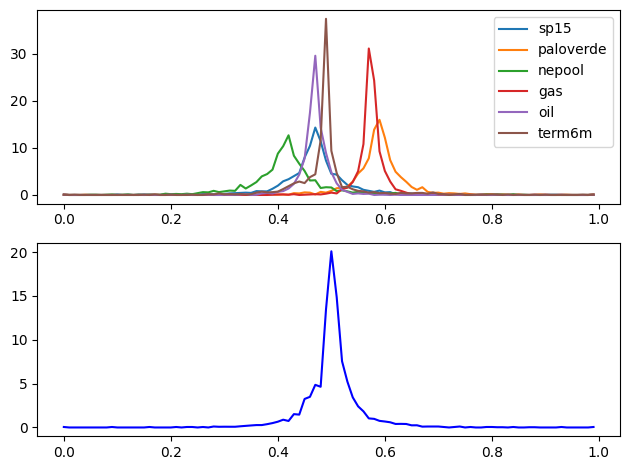

In [ ]:
plt.figure(2)
plt.clf()

plt.subplot(2, 1, 1)
for k, v in dik.items():
    plt.plot(bins[:-1], v, label=k)  # Use the label parameter to set the plot names
    plt.legend()  # Add legend based on the labels

plt.subplot(2, 1, 2)
plt.plot(bins[:-1], bary_wass2_c1, 'b')

plt.tight_layout()
plt.show()

In [ ]:
n = 100

x = np.arange(n, dtype=np.float64)
distout=[]
labelsc=[]
a=[]
for (columnName, columnData) in ret1.iteritems():
  histogram, bins = np.histogram(columnData, bins=n, range=(0, 1), density=True)
  a.append(histogram)
  labelsc.append(columnName)

A = np.vstack((a)).T
M = ot.utils.dist0(n)
M /= M.max()

reg = 1e-3

ot.tic()
bary_wass2_c1 = ot.bregman.barycenter(A, M, reg, verbose=False)
ot.toc()

Elapsed time : 0.2886533737182617 s


0.2886533737182617

In [ ]:
cols=ret1.columns
cols.shape

(6,)

In [ ]:
c=0
dik={}
for i in labelsc:
  dik[i]=A[:, c]
  c+=1

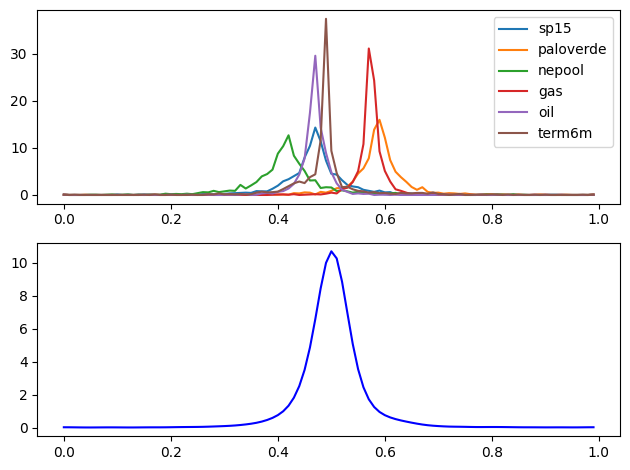

In [ ]:
plt.figure(2)
plt.clf()

plt.subplot(2, 1, 1)
for k, v in dik.items():
    plt.plot(bins[:-1], v, label=k)  # Use the label parameter to set the plot names
    plt.legend()  # Add legend based on the labels

plt.subplot(2, 1, 2)
plt.plot(bins[:-1], bary_wass2_c1, 'b')

plt.tight_layout()
plt.show()

In [ ]:
sequence=bins
distribution=bary_wass2_c1

In [ ]:
tax_synth_c1=random.choices(sequence[:-1], distribution,k=10000)
tax_synth_c1=pd.DataFrame(tax_synth_c1)

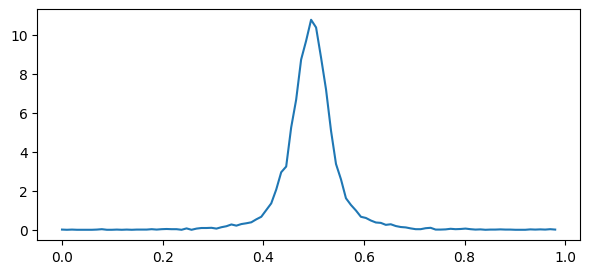

In [ ]:
histogram, bins1 = np.histogram(tax_synth_c1, bins=n,  density=True)
plt.figure(figsize=(7,3))
plt.plot(bins1[:-1], histogram)

##funcs


In [ ]:
# Useful constants definition
COLORMAP = 'jet'

def get_network_graph2(mtf):
    # Build the graph with networkx:
    graph = nx.from_numpy_matrix(mtf)

    # Loops through the edges to get associate each of them with the
    # corresponding Markov transition probability:
    weights = [mtf[u,v] for u,v in graph.edges()]
    for index, e in enumerate(graph.edges()):
        graph[e[0]][e[1]]['weight'] = weights[index]

    return graph

def compute_network_graph_statistics2(partitions, graph=None, mtf=None):
    if (graph is None) and (mtf is not None):
        graph = get_network_graph(mtf)

    #partitions = community_louvain.best_partition(graph, random_state=1234)
    nb_partitions = len(set(partitions.values()))
    modularity = community_louvain.modularity(partitions, graph)


    diameter = nx.diameter(graph)
    node_size = list(nx.clustering(graph, weight='weight').values())
    avg_clustering_coeff = np.array(node_size).mean()
    density = nx.density(graph)
    avg_path_length = nx.average_shortest_path_length(graph, weight='weight', method='dijkstra')

    average_degree = nx.average_degree_connectivity(graph)
    average_degree = np.mean(list(average_degree.values()))
    avg_weighted_degree = nx.average_degree_connectivity(graph, weight='weight')
    avg_weighted_degree = np.mean(list(avg_weighted_degree.values()))

    statistics = {
        'Diameter': diameter,
        'Average degree': average_degree,
        'Average weighted degree': avg_weighted_degree,
        'Density': density,
        'Average path length': avg_path_length,
        'Average clustering coefficient': avg_clustering_coeff,
        'Modularity': modularity,
        'Partitions': nb_partitions
    }

    return statistics

def get_modularity_encoding2(graph, colormap=COLORMAP, reversed_cmap=False):

    if reversed_cmap == True:
        colormap = plt.cm.get_cmap(colormap).reversed()
    else:
        colormap = plt.cm.get_cmap(colormap)

    # Get the node partitions and number of partitions found with the Louvain
    # algorithm, as implemented in the `community` package:

    partitions = community_louvain.best_partition(graph, random_state=1234)
    #####################################

    nb_partitions = len(set(partitions.values()))
    #print("nb_partitions: ",nb_partitions)

    # Compute node colors and edges colors for the modularity encoding:
    edge_colors = [to_hex(colormap(partitions.get(v)/(nb_partitions - 1))) for u,v in graph.edges()]
    node_colors = [partitions.get(node) for node in graph.nodes()]
    node_size = list(nx.clustering(graph, weight='weight').values())
    node_size = list((node_size - np.min(node_size)) * 2000 + 10)

    # Store the encoding to return in a dictionnary:
    #print("node_colors: ",len(set(node_colors)))

    encoding = {
        'node_size': node_size,
        'edge_color': edge_colors,
        'node_color': node_colors
    }
    return encoding, partitions

def foo(w,m,v):

  x2=[]
  x3=[]
  x4=[]
  n=len(w)

  for j in range(n):
    x2.append(v[j]+m[j]**2)
    x3.append(pow(m[j],3)+3*m[j]*v[j])
    x4.append(pow(m[j],4)+6*m[j]**2*v[j]+3*v[j]**2)

  X1=np.dot(w,m)
  X2=np.dot(w,x2)
  X3=np.dot(w,x3)
  X4=np.dot(w,x4)

  mu=X1

  sig=np.sqrt(np.subtract(X2, mu**2))

  sk=(X3-3*X2*X1+2*pow(X1,3))/pow(sig,3)
  kur=(X4-4*X3*X1+6*X2*X1**2-3*pow(X1,4))/pow(sig,4)

  return [mu, sig, sk, kur]

def get_network_graph_map2(timeseries, encoding, colormap=COLORMAP, reversed_cmap=False):

    # Get encoding definitions:
    node_colors = encoding['node_color']

    #print(node_colors)

    image_size = len(node_colors)
    #print("node_colors",node_colors)
    #print("np.max(node_colors)",np.max(node_colors))
    partition_color = node_colors / np.max(node_colors)

    # Define the color map:
    if reversed_cmap == True:
        colormap = plt.cm.get_cmap(colormap).reversed()
    else:
        colormap = plt.cm.get_cmap(colormap)

    # Plot each subset of the signal with the color associated to the network
    # graph partition it belongs to:
    network_graph_map = []
    sequences_width = timeseries.shape[0] / image_size

    #df=pd.DataFrame([{"color": p ,"value": k}])

    for i in range(image_size):
        c = colormap(partition_color[i])

        start = int(i * sequences_width)
        end = int((i+1) * sequences_width)#-1
        data = timeseries.iloc[start:end, :]

        current_map = dict()

        current_map.update({
            'color': c,
            'slice': data
        })

        #print(len(current_map["slice"]))

        network_graph_map.append(current_map)

    return network_graph_map, node_colors


def inversemapAna(ng_map2,colors2):

  df=pd.DataFrame(columns=["color","value"])
  dout=pd.DataFrame(columns=["color","value"])

  #if (len(ng_map2)!=len(colors2)):
  #    print("ERROR")

  for i in range(len(ng_map2)):
      d=ng_map2[i]
      p=colors2[i]
      slic=d["slice"].values.reshape(-1)

      for k in slic:
        df=df.append([{"color": p ,"value": k}], ignore_index=True)

  df["diff"]=df["value"]-df["value"].shift(1)
  df.drop(df.index[[0]], inplace=True)
  df.drop(['value'], axis = 1, inplace=True)
  df.rename(columns = {'diff':'value'}, inplace = True)
  #print(df)
  return df


In [ ]:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False,
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()

##NEU2

In [ ]:
import numpy as np
import networkx as nx
from sklearn.preprocessing import normalize
from karateclub.estimator import Estimator

class NEU2(Estimator):

    def __init__(self, L1: float = 0.5, L2: float = 0.25, T: int = 1, seed: int = 42):
        self.iterations = T
        self.L1 = L1
        self.L2 = L2
        self.seed = seed

    def _normalize_embedding(self, original_embedding):
        norms = np.linalg.norm(original_embedding, axis=1)
        normalized_embedding = (original_embedding.T / norms).T
        return normalized_embedding

    def _update_embedding(self, graph, original_embedding):
        embedding = self._normalize_embedding(original_embedding)
        adjacency = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))
        normalized_adjacency = normalize(adjacency, norm="l1", axis=1)
        for _ in range(self.iterations):
            embedding = (
                embedding
                + self.L1 * (normalized_adjacency @ embedding)
                + self.L2 * (normalized_adjacency @ (normalized_adjacency @ embedding))
            )
        return embedding

    def fit(self, graph: nx.classes.graph.Graph, features):
        self._set_seed()
        graph = self._check_graph(graph)

        #print(features)

        self.model = ASNE()
        self.model.fit(graph, features)
        original_embedding = self.model.get_embedding()
        self._embedding = self._update_embedding(graph, original_embedding)


    def get_embedding(self) -> np.array:
        return self._embedding

##Embedding functions and generation C1

In [ ]:
def createEmbedding1(out, tax_synth, pos):
    strategies=["natural","horizontal"]
    r = tax_synth.values[:,pos]#######################
    klist=range(1, 101, 1)
    models=[ASNE(), Diff2Vec(), GraphWave()]
    clus=pd.DataFrame()
    returns=pd.DataFrame(tax_synth.values[:,pos])
    col=[]
    #out=pd.DataFrame()
    features=sparse.coo_matrix(np.array(r))

    for model in models:
      for strategy in strategies:

        if (strategy=="natural"):
          g = NaturalVG(directed=None,weighted=None).build(r)
        elif (strategy=="horizontal"):
          g=HorizontalVG(directed=None,weighted=None).build(r)
        graph= g.as_networkx()

        if ("ASNE" in str(model)):
          model.fit(graph, features)
        else:
          model.fit(graph)

        namemodel=find_between_r( str(model), ".", " object at" )
        embedding=model.get_embedding()
        print(model,strategy)

        np.savetxt("/content/drive/MyDrive/Mari/Paper6/helpers/ctot_embedding_bins"+str(n)+"_"+namemodel+"_"+strategy, embedding)

In [ ]:
def createEmbedding2(out, tax_synth, pos):
  strategies=["natural","horizontal"]
  r = tax_synth.values[:,pos]
  klist=range(1, 101, 1)

  models=["ASNE", "Diff2Vec", "GraphWave"]

  clus=pd.DataFrame()
  returns=pd.DataFrame(tax_synth.values[:,pos])
  col=[]
  #out=pd.DataFrame()
  features=sparse.coo_matrix(np.array(r))

  for modelpoint in models:
    for strategy in strategies:
      if (strategy=="natural"):
        g = NaturalVG(directed=None,weighted=None).build(r)
      elif (strategy=="horizontal"):
        g=HorizontalVG(directed=None,weighted=None).build(r)
      graph= g.as_networkx()

      if (modelpoint=="ASNE"):
        model=NEU2()
        model.fit(graph, features)
        modellabel="NEU_ASNE"
      elif (modelpoint=="Diff2Vec"):
        model=NEU()
        model.fit(graph, Diff2Vec())
        modellabel="NEU_Diff2Vec"
      elif (modelpoint=="GraphWave"):
        model=NEU()
        model.fit(graph, GraphWave())
        modellabel="NEU_GraphWave"

      embedding=model.get_embedding()
      print(modelpoint,strategy)
      np.savetxt("/content/drive/MyDrive/Mari/Paper6/helpers/ctot_embedding_bins"+str(n)+"_"+modellabel+"_"+strategy, embedding)


In [ ]:
out=pd.DataFrame()
pos=0  ####
createEmbedding1(out, tax_synth_c1, pos)
out=pd.DataFrame()
createEmbedding2(out, tax_synth_c1, pos)

<karateclub.node_embedding.attributed.asne.ASNE object at 0x7d8bcfdfbdf0> natural
<karateclub.node_embedding.attributed.asne.ASNE object at 0x7d8bcfdfbdf0> horizontal


<karateclub.node_embedding.neighbourhood.diff2vec.Diff2Vec object at 0x7d8bcfdfb520> natural


<karateclub.node_embedding.neighbourhood.diff2vec.Diff2Vec object at 0x7d8bcfdfb520> horizontal


2024-01-02 12:00:05,185:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


<karateclub.node_embedding.structural.graphwave.GraphWave object at 0x7d8bcfdfbca0> natural


2024-01-02 12:19:06,823:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


<karateclub.node_embedding.structural.graphwave.GraphWave object at 0x7d8bcfdfbca0> horizontal
ASNE natural
ASNE horizontal


Diff2Vec natural


Diff2Vec horizontal


2024-01-02 12:56:44,897:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


GraphWave natural


2024-01-02 13:14:47,926:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


GraphWave horizontal


##Main script to compute GMM leveraging the embedding

In [ ]:
def script(out, tax_synth, pos):
    strategies=["natural","horizontal"]
    r = tax_synth.values[:,pos]
    klist=range(1, 101, 1)
    models=["ASNE", "Diff2Vec", "GraphWave","NEU_ASNE", "NEU_Diff2Vec","NEU_GraphWave"]
    clus=pd.DataFrame()
    returns=pd.DataFrame(tax_synth.values[:,pos])
    col=[]
    features=sparse.coo_matrix(np.array(r))

    for model in models:
      for strategy in strategies:
        fname="/content/drive/MyDrive/Mari/Paper6/helpers/ctot_embedding_bins"+str(n)+"_"+model+"_"+strategy
        embedding=np.loadtxt(fname)

        for k in klist:
            clusters = tomato(points=embedding, k=k)

            num_clusters=len(set(clusters))

            clus=pd.DataFrame(clusters,columns=["cluster"])
            clus.drop(clus.index[0], inplace=True)

            colors=list(range(0,num_clusters))

            returnCluster=clus.join(returns)

            if (num_clusters<=5):
                tag_df=returns
                tag_df=pd.DataFrame(tag_df.values)

                means=[]
                precisions=[]
                nk=[]

                for x in colors:
                  a=returnCluster[returnCluster.cluster==x]
                  means.append(np.mean(a.values))
                  precisions.append(1/pow(np.std(a.values),2))
                  nk.append(len(a)/(len(returnCluster)))

                precisions=np.array(precisions).reshape(-1,1,1)
                means=np.array(means).reshape(-1,1)

                grid=pd.DataFrame(columns=["idxs","bic","comp","weights","means","covariances"])
                grid.set_index("idxs")

                itemorig={"1":tag_df.mean(),
                      "2":tag_df.std(),
                      "3":skew(tag_df),
                      "4":kurtosis(tag_df)+3
                }

                #XY = tag_df.values.reshape(-1, 1)
                XY = tag_df.values
                gmm = GaussianMixture(n_components=len(nk), weights_init=nk, means_init=means, precisions_init=precisions, covariance_type='full').fit(XY)

                nosim=foo(gmm.weights_.reshape(-1),gmm.means_.reshape(-1),gmm.covariances_.reshape(-1))

                gmmid=str(uuid.uuid4())

                grid={
                      'idxs':gmmid,
                      #'comptomato':num_clusters,
                      'comps':gmm.n_components,
                      'k':k,
                      'embedding': model,
                      'strategy': strategy,
                      'bic':gmm.bic(XY) ,
                      'weights':gmm.weights_.reshape(-1),
                      'means':gmm.means_.reshape(-1),
                      'covariances':gmm.covariances_.reshape(-1),

                      'orig_M1':itemorig["1"],
                      'orig_M2':itemorig["2"],
                      'orig_M3':itemorig["3"],
                      'orig_M4':itemorig["4"],

                      'GMM_M1':nosim[0] ,
                      'GMM_M2':nosim[1] ,
                      'GMM_M3':nosim[2] ,
                      'GMM_M4':nosim[3] ,

                      'absdiff_M1':abs(itemorig["1"]-nosim[0]),
                      'absdiff_M2':abs(itemorig["2"]-nosim[1]),
                      'absdiff_M3':abs(itemorig["3"]-nosim[2]),
                      'absdiff_M4':abs(itemorig["4"]-nosim[3]),

                      'eps1':100*abs((itemorig["1"]-nosim[0])/(itemorig["1"])),
                      'eps2':100*abs((itemorig["2"]-nosim[1])/(itemorig["2"])),
                      'eps3':100*abs((itemorig["3"]-nosim[2])/(itemorig["3"])),
                      'eps4':100*abs((itemorig["4"]-nosim[3])/(itemorig["4"]))
                }

                out = out.append(grid, ignore_index=True)

                print(k,model, strategy,"#")
    out.to_excel("/content/drive/MyDrive/Mari/Paper6/out/ctot_res_"+str(n)+".xlsx")

In [ ]:
out=pd.DataFrame()
pos=0
script(out, tax_synth_c1, pos)